## Credit card fraud detection

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset

In [85]:
train = pd.read_csv(r"D:\vishal\Imarticus\CodSoft\CREDIT CARD FRAUD\fraudTrain.csv")
train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


### EDA

In [3]:
train.shape

(1296675, 23)

#### Checking missing values

In [4]:
train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* No missing values

#### Removing irrelevant columns

In [5]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
train.drop(columns=['Unnamed: 0',"cc_num","lat","long","trans_num","merch_lat",
                    "merch_long","trans_date_trans_time"],axis=1, inplace=True)
train.head(3)

,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,unix_time,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,1325376018,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1325376044,0
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,1325376051,0


#### Converting Float to int (amt)

In [7]:
train.dtypes

merchant      object
category      object
amt          float64
first         object
last          object
gender        object
street        object
city          object
state         object
zip            int64
city_pop       int64
job           object
dob           object
unix_time      int64
is_fraud       int64
dtype: object

In [8]:
train["amt"] = train["amt"].astype("int")

In [9]:
train.dtypes

merchant     object
category     object
amt           int32
first        object
last         object
gender       object
street       object
city         object
state        object
zip           int64
city_pop      int64
job          object
dob          object
unix_time     int64
is_fraud      int64
dtype: object

#### Label Encoding

In [10]:
Number = train[train.select_dtypes(include=[np.number]).columns.tolist()]

In [11]:
Qualitative = train[train.select_dtypes(include=[object]).columns.tolist()]

#### Converting Qualitative data into Quantitative

In [12]:
from sklearn.preprocessing import LabelEncoder
Qualitative = Qualitative.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob
0,514,8,162,18,0,568,526,27,370,779
1,241,4,309,157,0,435,612,47,428,607
2,390,0,115,381,1,602,468,13,307,302


In [13]:
Final = pd.concat([Qualitative,Number],axis = 1)
Final.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,514,8,162,18,0,568,526,27,370,779,4,28654,3495,1325376018,0
1,241,4,309,157,0,435,612,47,428,607,107,99160,149,1325376044,0
2,390,0,115,381,1,602,468,13,307,302,220,83252,4154,1325376051,0


In [14]:
Final.shape

(1296675, 15)

#### Splitting Data into X_train and y_train

In [15]:
X_train = Final.drop(["is_fraud"],axis = 1)
X_train.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time
0,514,8,162,18,0,568,526,27,370,779,4,28654,3495,1325376018
1,241,4,309,157,0,435,612,47,428,607,107,99160,149,1325376044
2,390,0,115,381,1,602,468,13,307,302,220,83252,4154,1325376051


#### Scaling dataset

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.85165441,  0.45285278, -0.18724154, ..., -0.74913592,
        -0.28258876, -1.85866447],
       [-0.50688018, -0.56926552,  1.31992898, ...,  1.87256653,
        -0.29366984, -1.85866244],
       [ 0.23459108, -1.59138383, -0.66912599, ...,  1.2810418 ,
        -0.28040632, -1.8586619 ],
       ...,
       [ 1.27464137, -1.33585425, -1.08949327, ...,  1.46967676,
        -0.29118603,  1.75785644],
       [ 0.82677283, -1.33585425, -0.01294291, ...,  0.33299588,
        -0.29043427,  1.75786142],
       [ 0.13506474, -1.33585425, -0.20774726, ...,  0.41164026,
        -0.29344133,  1.7578615 ]])

In [17]:
X_train.mean(axis=0)

array([ 1.16320943e-16,  4.11637228e-17,  1.45125138e-16, -3.50867036e-17,
       -4.72407421e-17,  1.37842578e-17, -1.75844498e-17, -5.01943159e-17,
       -5.93564225e-17, -1.40324895e-16,  7.87985003e-18, -3.35825180e-17,
       -1.35075315e-18, -2.57135179e-15])

In [18]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
X_train = pd.DataFrame(X_train,columns=['merchant','category','first','last','gender','street','city','state','job','dob','amt','zip','city_pop','unix_time'])
X_train.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651


In [20]:
y_train = Final[["is_fraud"]]
y_train.head(3)

,is_fraud
0,0
1,0
2,0


### Let's Perform the same steps for the Test Dataset

In [21]:
test = pd.read_csv(r"D:\vishal\Imarticus\CodSoft\CREDIT CARD FRAUD\fraudTest.csv")
test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


### EDA

#### Checking missing values

In [22]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* no missing values

In [23]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [24]:
test.drop(columns=['Unnamed: 0',"cc_num","lat","long","trans_num","merch_lat",
                    "merch_long","trans_date_trans_time"],axis=1, inplace=True)

In [25]:
test.head(3)

,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,unix_time,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,333497,Mechanical engineer,1968-03-19,1371816865,0
1,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,302,"Sales professional, IT",1990-01-17,1371816873,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,34496,"Librarian, public",1970-10-21,1371816893,0


#### Converting Float to interger 

In [26]:
test.dtypes

merchant      object
category      object
amt          float64
first         object
last          object
gender        object
street        object
city          object
state         object
zip            int64
city_pop       int64
job           object
dob           object
unix_time      int64
is_fraud       int64
dtype: object

In [27]:
test['amt'] = test['amt'].astype("int")

In [28]:
test.dtypes

merchant     object
category     object
amt           int32
first        object
last         object
gender       object
street       object
city         object
state        object
zip           int64
city_pop      int64
job          object
dob          object
unix_time     int64
is_fraud      int64
dtype: object

#### Converting category to number

In [29]:
Number1 = test[test.select_dtypes(include=[np.number]).columns.tolist()]

In [30]:
Qualitative1 = test[test.select_dtypes(include=[object]).columns.tolist()]

#### label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
Qualitative1 = Qualitative1.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative1.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob
0,319,10,151,115,1,341,157,39,275,376
1,591,10,163,457,0,354,16,43,392,760
2,611,5,24,249,0,865,61,33,259,421


In [32]:
Final1 = pd.concat([Qualitative,Number],axis = 1)
Final1.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,514,8,162,18,0,568,526,27,370,779,4,28654,3495,1325376018,0
1,241,4,309,157,0,435,612,47,428,607,107,99160,149,1325376044,0
2,390,0,115,381,1,602,468,13,307,302,220,83252,4154,1325376051,0


#### Splitting Dataset into X_test and y_test

In [33]:
X_test = Final1.drop(["is_fraud"],axis=1)
X_test.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time
0,514,8,162,18,0,568,526,27,370,779,4,28654,3495,1325376018
1,241,4,309,157,0,435,612,47,428,607,107,99160,149,1325376044
2,390,0,115,381,1,602,468,13,307,302,220,83252,4154,1325376051


#### Scaling data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.85165441,  0.45285278, -0.18724154, ..., -0.74913592,
        -0.28258876, -1.85866447],
       [-0.50688018, -0.56926552,  1.31992898, ...,  1.87256653,
        -0.29366984, -1.85866244],
       [ 0.23459108, -1.59138383, -0.66912599, ...,  1.2810418 ,
        -0.28040632, -1.8586619 ],
       ...,
       [ 1.27464137, -1.33585425, -1.08949327, ...,  1.46967676,
        -0.29118603,  1.75785644],
       [ 0.82677283, -1.33585425, -0.01294291, ...,  0.33299588,
        -0.29043427,  1.75786142],
       [ 0.13506474, -1.33585425, -0.20774726, ...,  0.41164026,
        -0.29344133,  1.7578615 ]])

In [35]:
X_test.mean(axis=0)

array([ 1.16320943e-16,  4.11637228e-17,  1.45125138e-16, -3.50867036e-17,
       -4.72407421e-17,  1.37842578e-17, -1.75844498e-17, -5.01943159e-17,
       -5.93564225e-17, -1.40324895e-16,  7.87985003e-18, -3.35825180e-17,
       -1.35075315e-18, -2.57135179e-15])

In [36]:
X_test.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
X_test = pd.DataFrame(X_test,columns=['merchant','category','first','last','gender','street','city','state','job',"dob",'amt','zip','city_pop','unix_time'])
X_test.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651


In [38]:
y_test = Final1[["is_fraud"]]
y_test.head(3)

,is_fraud
0,0
1,0
2,0


In [39]:
y_test.reset_index(drop=True, inplace=True)
y_test.head(3)

,is_fraud
0,0
1,0
2,0


### Model Building

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) 
output

LogisticRegression()

In [41]:
output.intercept_    # Beto 

array([-5.35600911])

In [42]:
output.coef_         # Beta 1 -- 

array([[-0.00939075,  0.05530894, -0.03938014, -0.00379185,  0.11060147,
         0.00616534, -0.027529  ,  0.03722515,  0.00050764, -0.19187116,
         0.43674568, -0.02202031,  0.03843015, -0.07096642]])

#### Prediction on Train Dataset

In [43]:
train1 = pd.concat([X_train,y_train],axis=1)
train1.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0


In [44]:
train1['Predicted'] = output.predict(X_train)
train1.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0


#### Classification Report of Train data

In [45]:
from sklearn.metrics import classification_report
print(classification_report(train1['is_fraud'],train1['Predicted']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



* Accuracy of train = 99%

#### Prediction on Test Dataset

In [46]:
test1 = pd.concat([X_test,y_test],axis=1)
test1.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0


In [47]:
test1['Predicted'] = output.predict(X_test)
test1.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0


#### Classification Report of Test data

In [48]:
from sklearn.metrics import classification_report
print(classification_report(test1['is_fraud'],test1['Predicted']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



* Accuracy of Test = 99%

### Decision Tree

In [49]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()  
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [50]:
train2 = pd.concat([X_train,y_train],axis=1)
train2.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0


In [51]:
independent_variable = list(train1.columns[1:])
independent_variable

['category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'amt',
 'zip',
 'city_pop',
 'unix_time',
 'is_fraud',
 'Predicted']

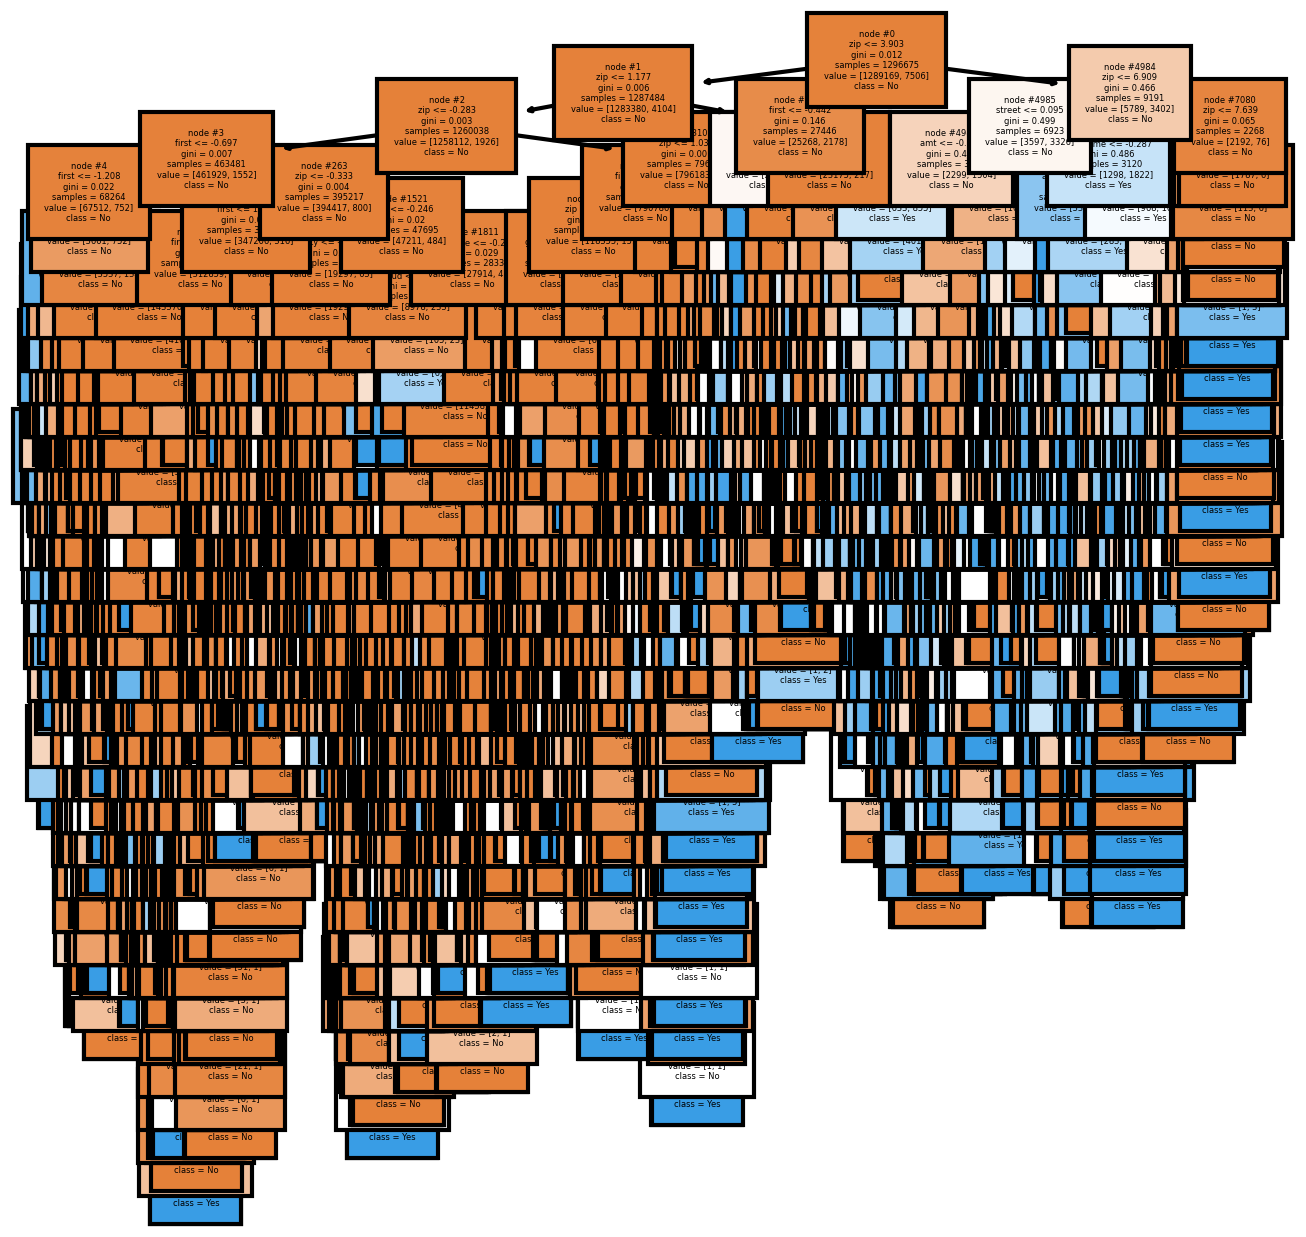

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt

Fraud = ['No', 'Yes'] 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt,  
               feature_names = independent_variable, 
               class_names = Fraud,
               filled = True, 
              node_ids=True, 
              fontsize=2); 

#### Train Dataset Prediction -

In [53]:
train2 = pd.concat([X_train,y_train],axis=1)
train2.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0


In [54]:
train2['Predicted']=dt.predict(X_train)  # MODEL = dt
train2.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0,0


In [55]:
print(classification_report(train2['Predicted'], train2['is_fraud']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



* Here we get 100% Accuracy , it's overfitting 
* Avoid overfitting we have to do **Prunning**

### Pruning

In [56]:
dt = tree.DecisionTreeClassifier(criterion='gini',      #splitter
                                 min_samples_leaf=5,   #child
                                 min_samples_split=10, #parent 
                                 max_depth=4)           #branches

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10)

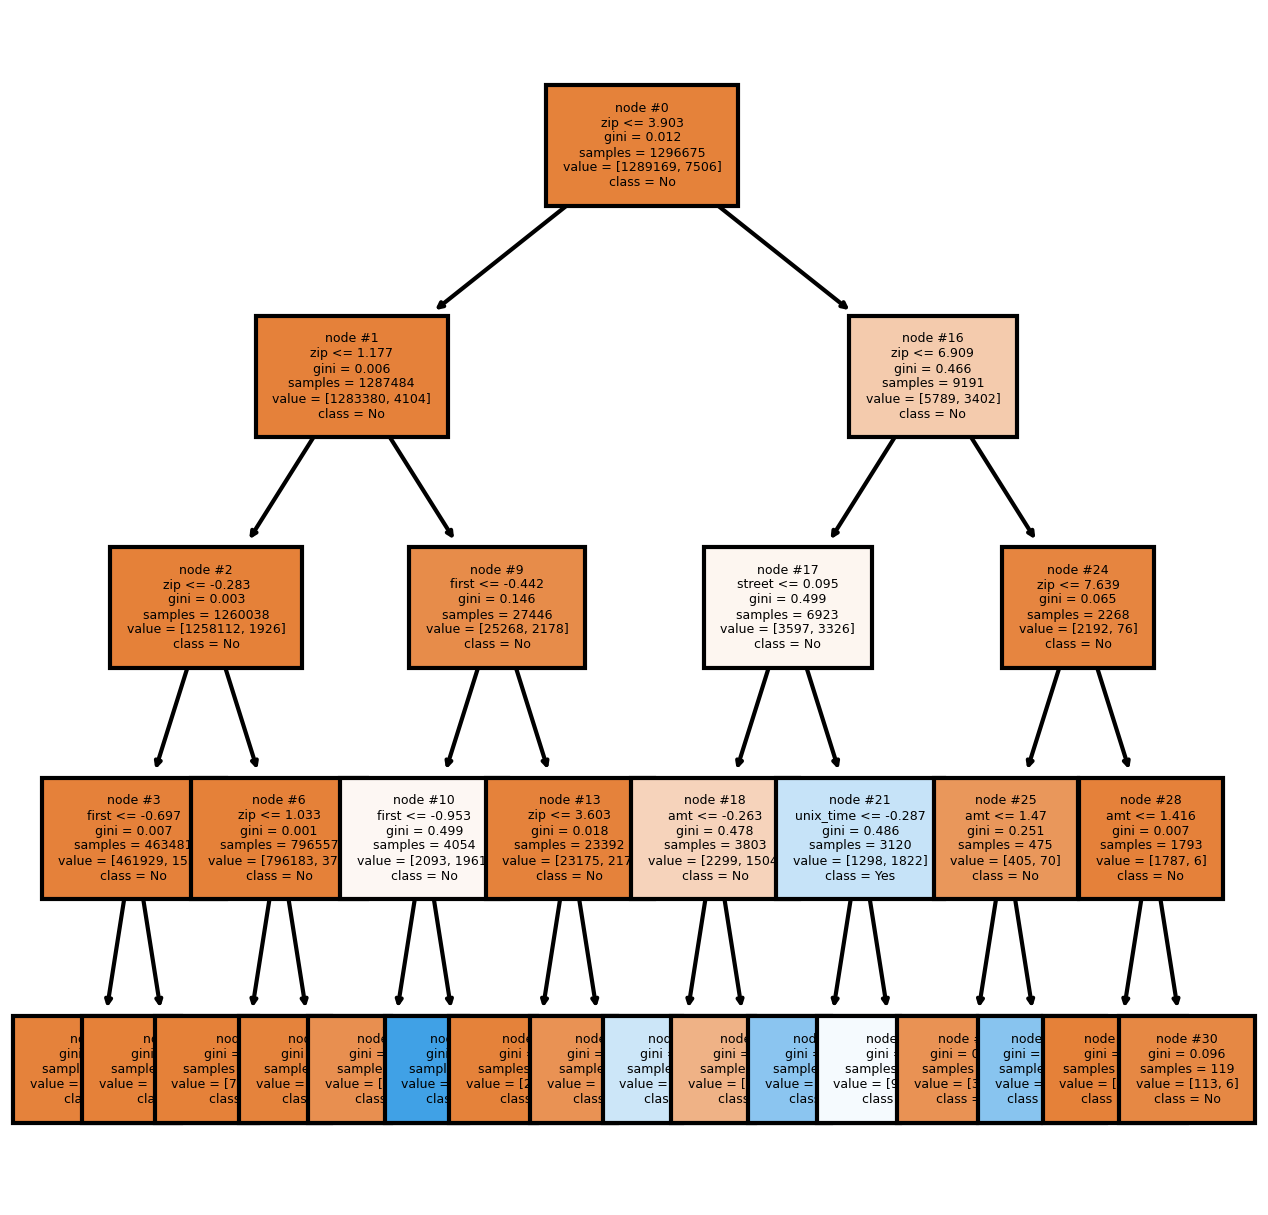

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt

Fraud=['No', 'Yes'] 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt, 
               feature_names = independent_variable,  
               class_names = Fraud, 
               filled = True,
               node_ids = True,
               fontsize=3); 

#### Train data Prediction after Pruning -

In [58]:
train2['Predicted']=dt.predict(X_train) 
train2.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0,0


In [59]:
print(classification_report(train2['Predicted'],train2['is_fraud']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290253
           1       0.59      0.69      0.63      6422

    accuracy                           1.00   1296675
   macro avg       0.79      0.84      0.82   1296675
weighted avg       1.00      1.00      1.00   1296675



* Accuracy of train data after **Prunning** = 100%

#### Test Data Prediction -

In [60]:
test2 = pd.concat([X_test,y_test],axis=1)
test2.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0


In [61]:
test2['Predicted']=dt.predict(X_test)  # MODEL = dt
test2.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0,0


In [62]:
print(classification_report(test2['Predicted'], test2['is_fraud']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290253
           1       0.59      0.69      0.63      6422

    accuracy                           1.00   1296675
   macro avg       0.79      0.84      0.82   1296675
weighted avg       1.00      1.00      1.00   1296675



* Accuracy of test data = 100%

### Naiive Bayes

#### Model Building

In [70]:

from sklearn.naive_bayes import BernoulliNB

model= BernoulliNB(alpha=0) 

model.fit(X_train, y_train)

BernoulliNB(alpha=0)

#### Prediction on train data

In [71]:
train4=pd.concat([X_train,y_train],axis=1)
train4.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0


In [72]:
train4['Probability']=model.predict_proba(X_train)[:,1]
train4['Predicted']=np.where(train4['Probability'] >= 0.7,1,0)  #thershold  >0.7
train4.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Probability,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0.002163,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0.007730,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0.013545,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0,0.002008,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0,0.002282,0


#### Classification Report of train data

In [73]:
print(classification_report(train4['is_fraud'], train4['Predicted']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



* Accuracy of train data = 99%

#### Prediction on test data

In [74]:
test4=pd.concat([X_test,y_test],axis=1)
test4.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0


In [75]:
test4['Probability']=model.predict_proba(X_test)[:,1]
test4['Predicted']=np.where(test4['Probability'] >= 0.7,1,0)  #thershold  >0.7
test4.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Probability,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0.002163,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0.007730,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0.013545,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0,0.002008,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0,0.002282,0


#### Classification report of test data

In [76]:
print(classification_report(test4['is_fraud'], test4['Predicted']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



* Accuracy of test data = 99%

### KNN (K- Nearest Neighbour)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)  

# randomly taken k =  4 
# taken  k = sqrt(n)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [78]:
train5=pd.concat([X_train,y_train],axis=1)
train5.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0


In [79]:
train5['Predicted']=model.predict(X_train)
train5.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0,0


In [80]:
print(classification_report(train5['is_fraud'], train5['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.81      0.44      0.57      7506

    accuracy                           1.00   1296675
   macro avg       0.90      0.72      0.79   1296675
weighted avg       1.00      1.00      1.00   1296675



In [81]:
test5=pd.concat([X_test,y_test],axis=1)
test5.head()

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0
3,0.085302,-1.080325,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.548333,-0.513059,-0.155054,0.402753,-0.287742,-1.858660,0
4,-0.228206,0.708382,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.964771,0.746848,-0.180005,-0.906090,-0.293835,-1.858651,0


In [82]:
test5['Predicted'] = model.predict(X_test)
test5.head(3)

,merchant,category,first,last,gender,street,city,state,job,dob,amt,zip,city_pop,unix_time,is_fraud,Predicted
0,0.851654,0.452853,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,0.848099,0.915085,-0.410800,-0.749136,-0.282589,-1.858664,0,0
1,-0.506880,-0.569266,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.262061,0.272047,0.231684,1.872567,-0.293670,-1.858662,0,0
2,0.234591,-1.591384,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,0.398450,-0.868225,0.936545,1.281042,-0.280406,-1.858662,0,0


In [83]:
print(classification_report(test5['is_fraud'], test5['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.81      0.44      0.57      7506

    accuracy                           1.00   1296675
   macro avg       0.90      0.72      0.79   1296675
weighted avg       1.00      1.00      1.00   1296675



Used Algorithm :

    1. logistic Regression train accuracy : 99%
                           test accuracy : 99%
      
       
    2. Decision Tree train accuracy : 100%
                     test accuracy : 100%
      
     
    3. Naiive Bayes  train accuracy : 99%
                     test accuracy : 99%
       
       
    3. KNN  train accuracy : 100%
            test accuracy : 100%
       
       

* Best Model is : Logistic Regression, Naiive Bayes

## END